# **Projet NLP: Classification IA and Human Texts**

<ins>Group :</ins>
- Thomas Sinapi
- Pierre Derathe
- Manitas Bahri

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

from pprint import pprint

In [3]:
df = pd.read_csv("data.csv")
X, y = df["text"], df["generated"].astype("int")

In [4]:
df2 = df

In [5]:
# remove 100000 data points from the dataset
df2 = df2.drop(df2.index[:485000])
df2.shape

(2235, 2)

In [6]:
X, y = df2["text"], df2["generated"].astype("int")

## **1. <ins>Data Analysing</ins>**

In [7]:
print("Human Text")
pprint(X[y == 0].iloc[0])

Human Text
("My fellow citizens, some advantages of limiting car usage is that it's "
 'better for the earth\xa0and reduces the greenhouse effect.\n'
 '\n'
 "Also, there won't be as much smog and there will be a lot less pollution in "
 'the air.\xa0 Limiting the usage of cars can be a better for you. Not using a '
 'car can really benefit us.\n'
 '\n'
 'People use cars every day for everyday things.\xa0 WF people cut down on the '
 'usage of cars and took the bus or even rode a bike to work it really could '
 'help the earth.\xa0 Fewer cars mean less of the greenhouse effect.\xa0 Less '
 'of the greenhouse effect means a better world.\n'
 '\n'
 'Billions of people driving cars can really pollute the earth.\xa0 Paris had '
 'to ban driving because the smog was too great and needed to be cleared from '
 "the sky.\xa0 The smog was so serious that if you didn't leave your car at "
 'home you would get a fine.\xa0 Almost 4,000 people were fined.\xa0 Beijing, '
 'China is one of the most po

In [8]:
print("AI Text")
pprint(X[y == 1].iloc[3])

AI Text
(' Dear Principal,\n'
 '\n'
 'As a student of [School Name], I strongly believe that Policy 1 is a '
 'beneficial change for our school. Allowing students to use their cell phones '
 'during lunchtime or during free time is a reasonable request that will not '
 'only benefit the students but also the school as a whole.\n'
 '\n'
 'One of the main reasons for this policy change is that it will allow '
 'students to stay connected with their families and friends, especially '
 'during lunchtime when they may not have the opportunity to speak with them. '
 'This will help to alleviate feelings of isolation and loneliness that some '
 'students may experience.\n'
 '\n'
 'Additionally, allowing students to use their cell phones during free time '
 'will provide them with a variety of educational resources and tools that '
 'they can use to enhance their learning experience. This will not only '
 'benefit the students but also the school as a whole, as it will help to '
 'create a mor

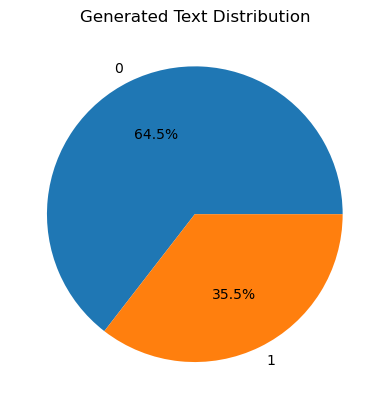

In [11]:
# Plot the distribution of the generated text
plt.pie(y.value_counts(), labels=y.value_counts().index, autopct='%1.1f%%')
plt.title("Generated Text Distribution")
plt.show()

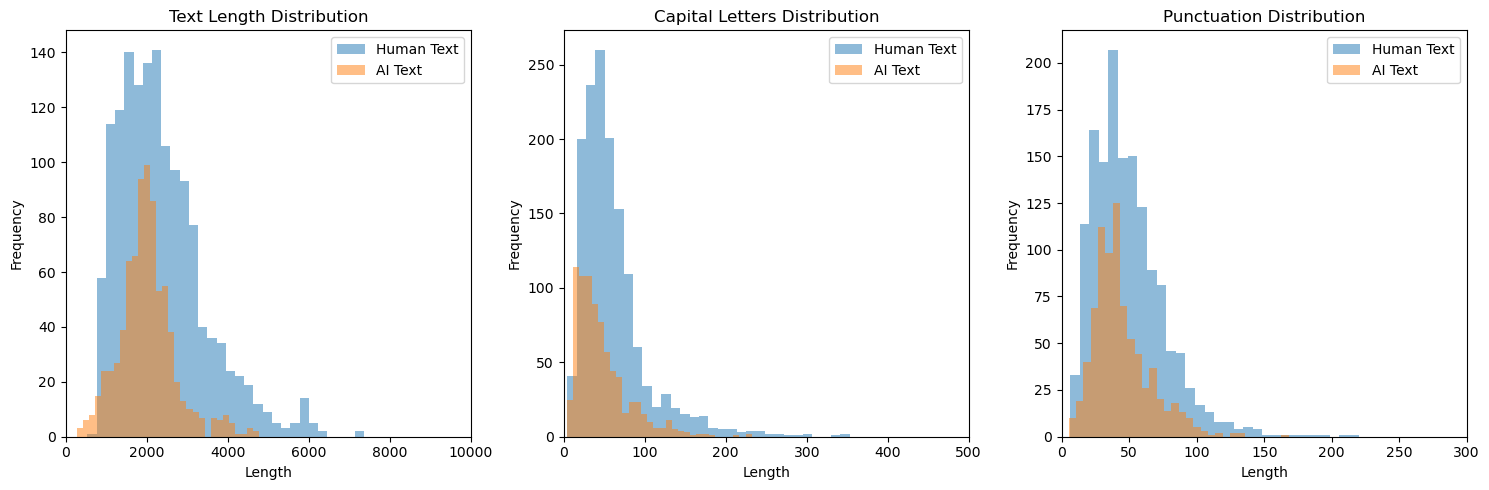

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plot the distribution of the text length by class
ax[0].hist(X[y == 0].str.len(), bins=30, alpha=0.5, label="Human Text")
ax[0].hist(X[y == 1].str.len(), bins=30, alpha=0.5, label="AI Text")
ax[0].set_title("Text Length Distribution")
ax[0].set_xlabel("Length")
ax[0].set_ylabel("Frequency")
ax[0].legend()
ax[0].set_xlim(0, 10000)

# Plot the distribution of the capital letters by class
count_upper_g = X.str.findall(r"[A-Z]").str.len().groupby(y)
ax[1].hist(count_upper_g.get_group(0), bins=30, alpha=0.5, label="Human Text")
ax[1].hist(count_upper_g.get_group(1), bins=30, alpha=0.5, label="AI Text")
ax[1].set_title("Capital Letters Distribution")
ax[1].set_xlabel("Length")
ax[1].set_ylabel("Frequency")
ax[1].legend()
ax[1].set_xlim(0, 500)

# Plot the distribution of the punctuation by class
count_punct_g = X.str.findall(r"[^\w\s]").str.len().groupby(y)
ax[2].hist(count_punct_g.get_group(0), bins=30, alpha=0.5, label="Human Text")
ax[2].hist(count_punct_g.get_group(1), bins=30, alpha=0.5, label="AI Text")
ax[2].set_title("Punctuation Distribution")
ax[2].set_xlabel("Length")
ax[2].set_ylabel("Frequency")
ax[2].legend()
ax[2].set_xlim(0, 300)

plt.tight_layout()
plt.show()

In [13]:
X_lower = X.str.lower()

In [14]:
X_clean =  X_lower.map(lambda x : re.sub(r"\W", " ", x))

In [15]:
# tokenize the text
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_cv = cv.fit_transform(X_clean)



In [16]:
print("Vocabulary Size:", len(cv.vocabulary_))
print("Most Common Words:", list(cv.vocabulary_.keys())[:10])
print("Least Common Words:", list(cv.vocabulary_.keys())[-10:])

Vocabulary Size: 18008
Most Common Words: ['mmm', 'hey', 'there', 'so', 'like', 'you', 'know', 'how', 'this', 'whole']
Least Common Words: ['lft', 'nft', 'ffd', 'fr', 'rmm', 'updates', 'coloring', 'ffr', 'bravery', 'unreality']


In [17]:
# skip gram 
from nltk.tokenize import word_tokenize
from nltk.util import skipgrams

In [18]:
x_tokens = X_clean.map(word_tokenize)


In [19]:
x_tokens

485000    [mmm, hey, there, so, like, you, know, how, th...
485001    [my, fellow, citizens, some, advantages, of, l...
485002    [is, recent, years, there, has, bees, a, growi...
485003    [cars, are, x, normal, form, of, transportatio...
485004    [a, today, s, world, it, is, important, to, ha...
                                ...                        
487230    [tie, face, on, mars, is, really, just, a, big...
487231    [the, whole, purpose, of, democracy, is, to, c...
487232    [i, firmly, believe, that, governments, worldw...
487233    [i, dfn, t, agree, with, this, decision, becau...
487234    [richard, non, jimmy, carter, and, bob, dole, ...
Name: text, Length: 2235, dtype: object

In [20]:
# avg number of tokens
avg_tokens = x_tokens.map(len).mean()

In [21]:
avg_tokens

394.67606263982105

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

svc = RandomForestClassifier()
svc.fit(X_train_tfidf, y_train)

y_pred = svc.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9038031319910514
Balanced Accuracy: 0.8769377787215968
Confusion Matrix:
 [[274   3]
 [ 40 130]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       277
           1       0.98      0.76      0.86       170

    accuracy                           0.90       447
   macro avg       0.93      0.88      0.89       447
weighted avg       0.91      0.90      0.90       447



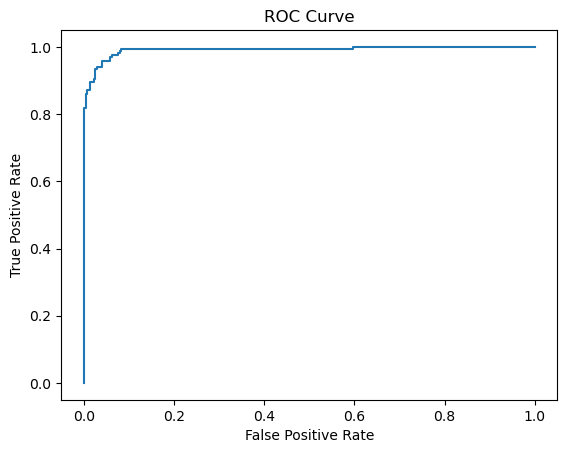

AUC: 0.9916118071777448


In [126]:
# roc curve and auc
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test_tfidf))
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

print("AUC:", roc_auc_score(y_test, svc.decision_function(X_test_tfidf)))


Text(50.722222222222214, 0.5, 'Actual')

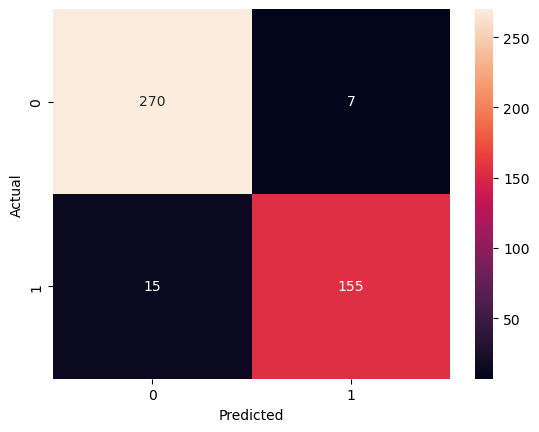

In [121]:
confusion_matrix(y_test, y_pred)

# plot the confusion matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

In [23]:
y_test.value_counts()

generated
0    277
1    170
Name: count, dtype: int64

In [32]:
X_train_tfidf.toarray().shape

(1788, 16317)

Accuracy: 0.9619686800894854
Balanced Accuracy: 0.9568167339137821
Confusion Matrix:
 [[271   6]
 [ 11 159]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       277
           1       0.96      0.94      0.95       170

    accuracy                           0.96       447
   macro avg       0.96      0.96      0.96       447
weighted avg       0.96      0.96      0.96       447



/Users/thomassinapi/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


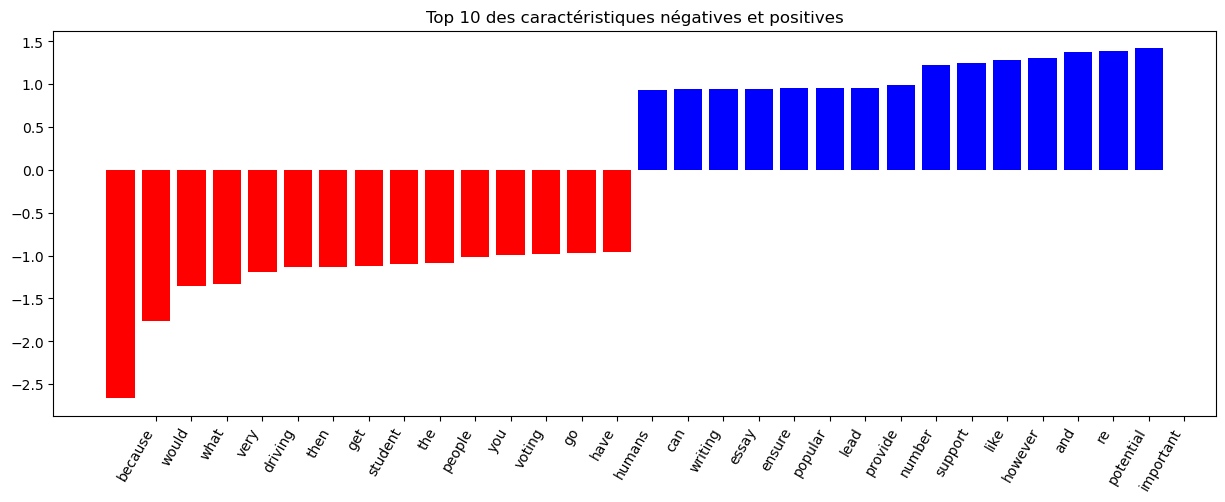

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, balanced_accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Votre code pour la division des données, le TF-IDF et l'entraînement
X_train, X_test, y_train, y_test = train_test_split(X_clean, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

y_pred = svc.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Visualisation des caractéristiques les plus importantes
coefficients = svc.coef_.flatten()
feature_names = np.array(tfidf.get_feature_names_out())
sorted_coef_index = coefficients.argsort()
top_positive_coefficients = sorted_coef_index[-15:]
top_negative_coefficients = sorted_coef_index[:15]
top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])

plt.figure(figsize=(15, 5))
colors = ['red' if c < 0 else 'blue' for c in coefficients[top_coefficients]]
plt.bar(np.arange(2 * 15), coefficients[top_coefficients], color=colors)
plt.xticks(np.arange(1, 1 + 2 * 15), feature_names[top_coefficients], rotation=60, ha='right')
plt.title('Top 10 des caractéristiques négatives et positives')
plt.show()


In [114]:
a = ["""The sun is shining and the birds are singing. It's a beautifoul days!"""]

In [115]:
b = ["My fellow citizens, some advantages of limiting car usage is that it is too easy to take part of the gas"]

In [116]:
a = tfidf.transform(a)
# b = tfidf.transform(b)

In [117]:
y_pred2 = svc.predict(a)

In [118]:
y_pred2

array([1])

In [123]:
X

485000    MMM... hey there!  So, like, you know how ther...
485001    My fellow citizens, some advantages of limitin...
485002    IS recent years, there has bees a growing move...
485003    Cars are x normal form of transportation some ...
485004    A today's world, it is important to have discu...
                                ...                        
487230    Tie Face on Mars is really just a big misunder...
487231    The whole purpose of democracy is to create a ...
487232    I firmly believe that governments worldwide sh...
487233    I DFN't agree with this decision because a LFT...
487234    Richard Non, Jimmy Carter, and Bob Dole and ot...
Name: text, Length: 2235, dtype: object

In [124]:
y

485000    1
485001    0
485002    1
485003    0
485004    1
         ..
487230    0
487231    0
487232    1
487233    0
487234    0
Name: generated, Length: 2235, dtype: int64